- 1. ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?
- 2. ¿Cuáles son los departamentos con mayor número de delitos?
- 3. ¿Cuáles son los motivos más comunes que originaron el registro de un delito?
- 4. ¿Existe alguna relación entre el mes del año y la cantidad de delitos?
- 5. ¿Hay alguna relación entre el lugar y el género de la victima? Cual es el genero que mayormente ocupa el rol de la victima?, que proporcion hay para cada sexo?
- 6. ¿Hay alguna relación entre el lugar y el género del inculpado? Cual es el genero que mayormente ocupa el rol de inculpad@?, que proporcion hay para cada sexo?
- 7. Cantidad de hechos por año?, cuales son los 3 años con mayor numero de delitos?
- 8. Relacion entre la cantidad de inculpados y victimas por hecho
- 9. 3 principales clases de victimas y la relacion de sexo de cada una.
- 10. Relacion entre la edad y el sexo de la victima
- 11. Relacion entre la edad y el sexo del inculpado

###1. ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?

In [50]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'
url1='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion01_datos_sexo_victima.csv'

In [51]:
import pandas as pd
df_original= pd.read_csv(url_original)
df_sexo_victimas=pd.read_csv(url1)
#Aca reemplazo los valores
df_sexo_victimas['sexo_victima'] = df_original['sexo_victima']
#Aca Agrego la columna
df_sexo_victimas['tipo_persona'] = df_original['tipo_persona']
#Filtro por victima
df_victima = df_sexo_victimas[df_sexo_victimas['tipo_persona'] == 'Víctima']



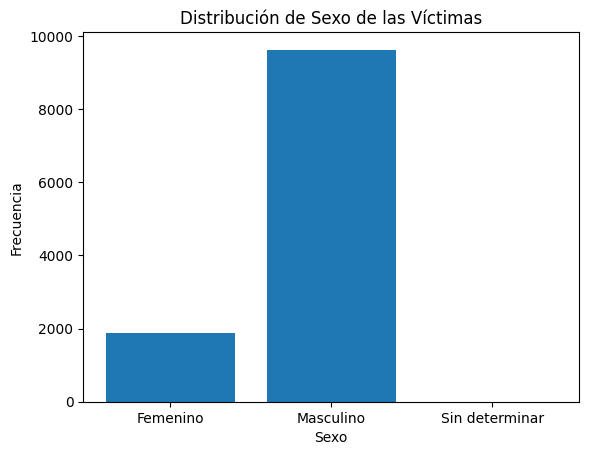

In [52]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y sus frecuencias en la columna 'sexo_victima'
values, counts = df_victima['sexo_victima'].value_counts().sort_index().values, df_victima['sexo_victima'].value_counts().sort_index().index

# Crear el gráfico de barras
plt.bar(counts, values)

# Configurar los ejes y el título
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sexo de las Víctimas')

# Mostrar el gráfico
plt.show()

¿Cuáles son los departamentos con mayor número de delitos?

In [53]:
url_original="https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv"
url2='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion02_datos_deptos_delitos.csv'

In [ ]:
import pandas as pd
df_original= pd.read_csv(url_original)
df_datos_deptos=pd.read_csv(url2)


#Aca reemplazo los valores
df_datos_deptos['localidad'] = df_original['localidad']

# Eliminar las filas duplicadas basadas en la columna 'Id_hecho'
df_datos_deptos_sin_duplicar = df_datos_deptos.drop_duplicates(subset='Id_hecho')

#Tomar los 10 lugares con mas cantidad de hechos delictivos

agrupado = df_datos_deptos_sin_duplicar.groupby('localidad').size()



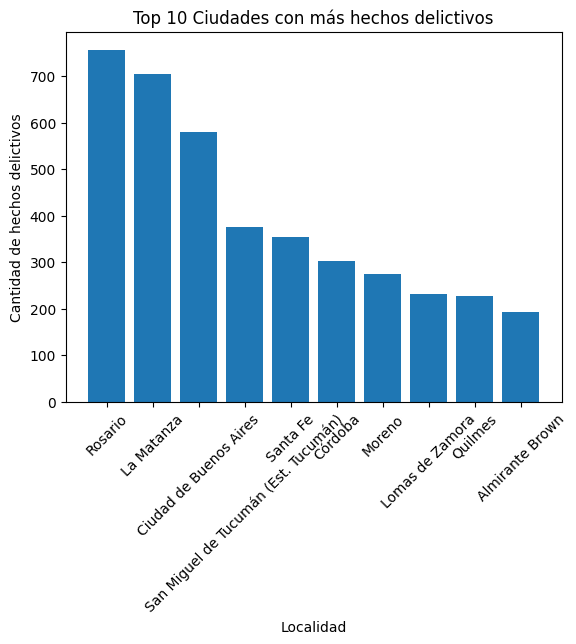

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df_datos_deptos_sin_duplicar'

# Agrupar por la columna 'localidad' y obtener la cuenta de ocurrencias
agrupado = df_datos_deptos_sin_duplicar.groupby('localidad').size()

# Seleccionar los diez grupos con mayor cantidad de ocurrencias
top_10 = agrupado.nlargest(10)

# Crear el gráfico de barras
plt.bar(top_10.index, top_10.values)
plt.xlabel('Localidad')
plt.ylabel('Cantidad de hechos delictivos')
plt.title('Top 10 Ciudades con más hechos delictivos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()




¿Cuáles son los motivos más comunes que originaron el registro de un delito?

In [70]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'
url3='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion03_datos_motivo_delitos.csv'

In [ ]:
import pandas as pd
df_original= pd.read_csv(url_original)
df_motivos=pd.read_csv(url3)


#Aca reemplazo los valores
df_motivos['motivo_origen_registro'] = df_original['motivo_origen_registro']

# Eliminar las filas duplicadas basadas en la columna 'Id_hecho'
df_motivos = df_motivos.drop_duplicates(subset='Id_hecho')

df_motivos

agrupado_motivos = df_motivos.groupby('motivo_origen_registro').size()
print(agrupado_motivos)

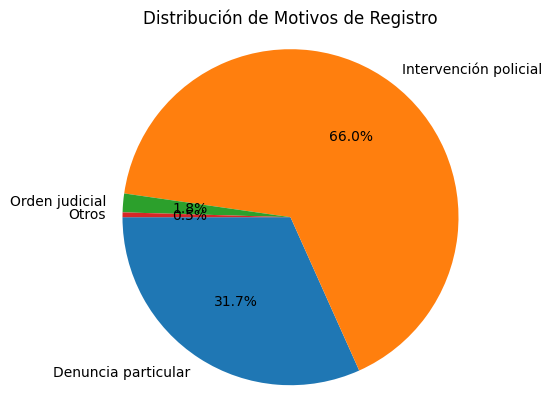

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df_motivos'

# Agrupar por la columna 'motivo_origen_registro' y obtener el conteo de ocurrencias
agrupado_motivos = df_motivos.groupby('motivo_origen_registro').size()

# Crear el gráfico de torta
grafico = agrupado_motivos.plot.pie(autopct='%1.1f%%', startangle=180)

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Distribución de Motivos de Registro')



# Mostrar el gráfico
plt.show()
